In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Tuple


1. Números Aleatórios Básicos:
random_float: [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735]
random_integers: [53 97 73 76 72]
random_choice: ['A' 'B' 'A' 'D' 'B']

2. Permutações:
original: [0 1 2 3 4 5 6 7 8 9]
shuffled: [0 1 8 4 7 2 9 5 6 3]
permutation: [6 1 2 7 9 5 8 4 0 3]
permuted: [3 2 6 5 1 4 8 9 0 7]

3. Distribuições Probabilísticas:

Estatística da distribuição beta:
mean: 0.291
std: 0.156
min: 0.006
max: 0.844
median: 0.275


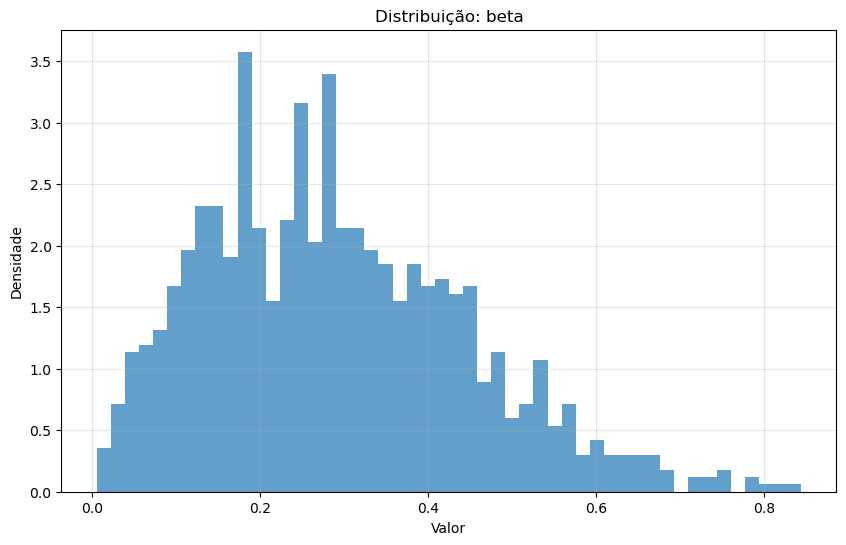


Estatística da distribuição binomial:
mean: 4.907
std: 1.548
min: 0.000
max: 10.000
median: 5.000


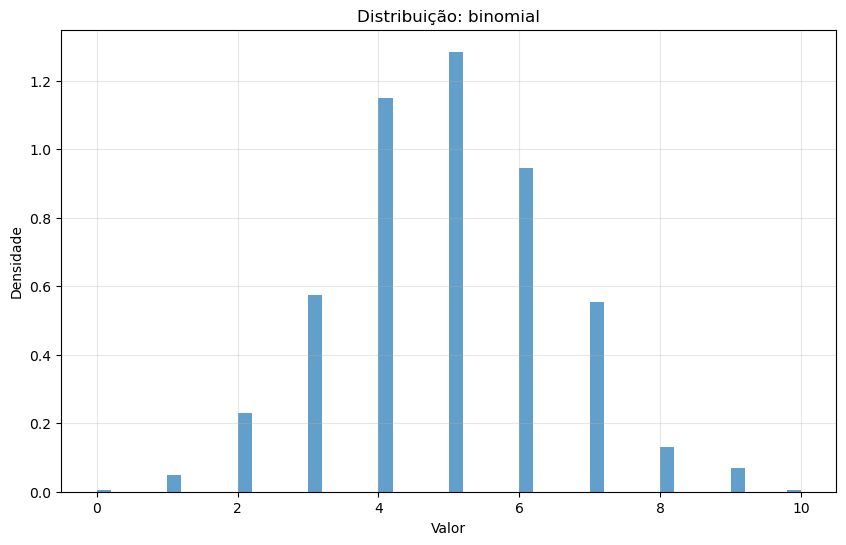


Estatística da distribuição chisquare:
mean: 1.974
std: 2.130
min: 0.001
max: 16.742
median: 1.298


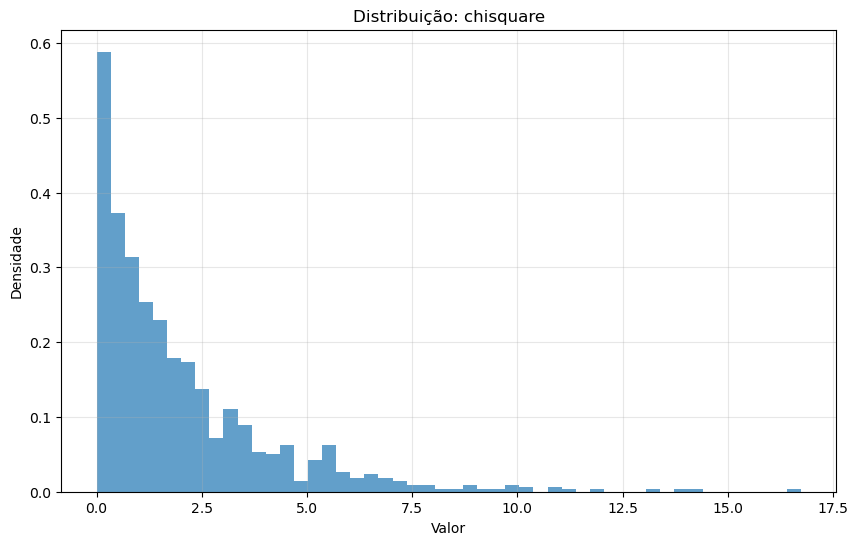


Estatística da distribuição exponential:
mean: 0.200
std: 0.190
min: 0.000
max: 1.226
median: 0.138


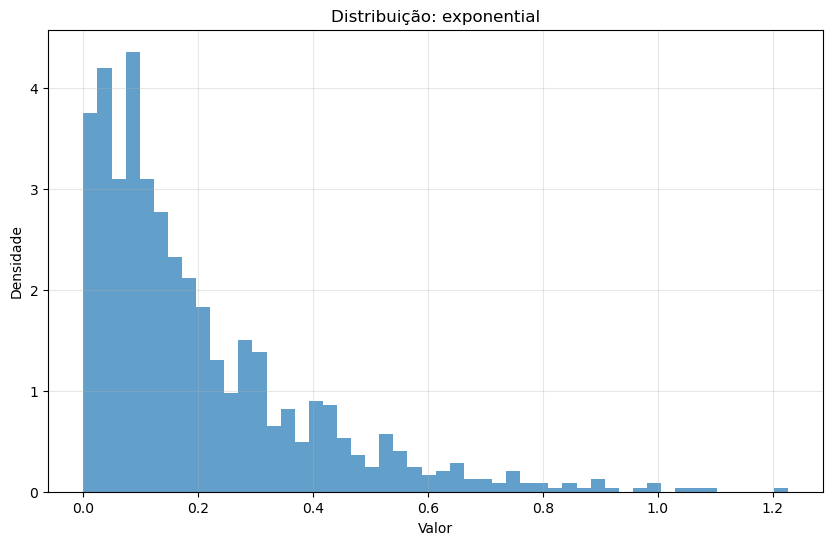


Estatística da distribuição gamma:
mean: 3.914
std: 2.702
min: 0.090
max: 16.696
median: 3.273


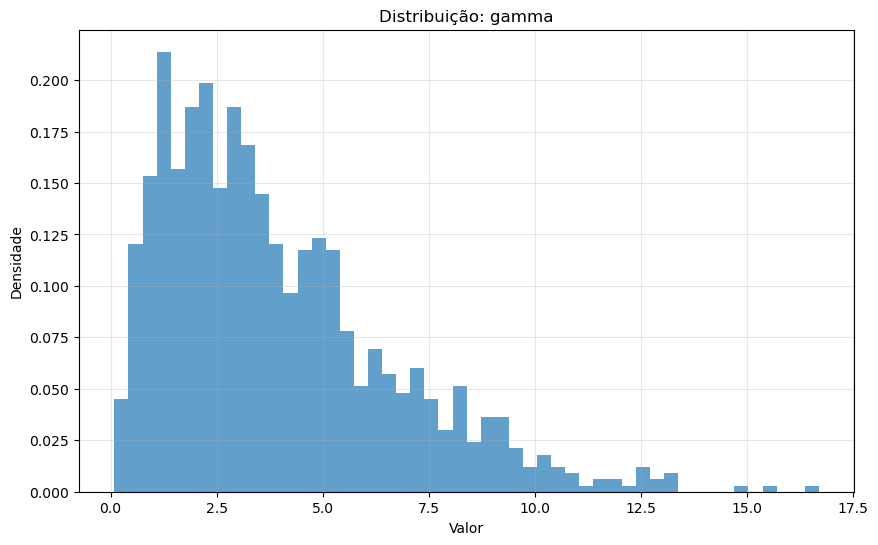


Estatística da distribuição logistic:
mean: -0.089
std: 1.912
min: -11.238
max: 7.535
median: 0.045


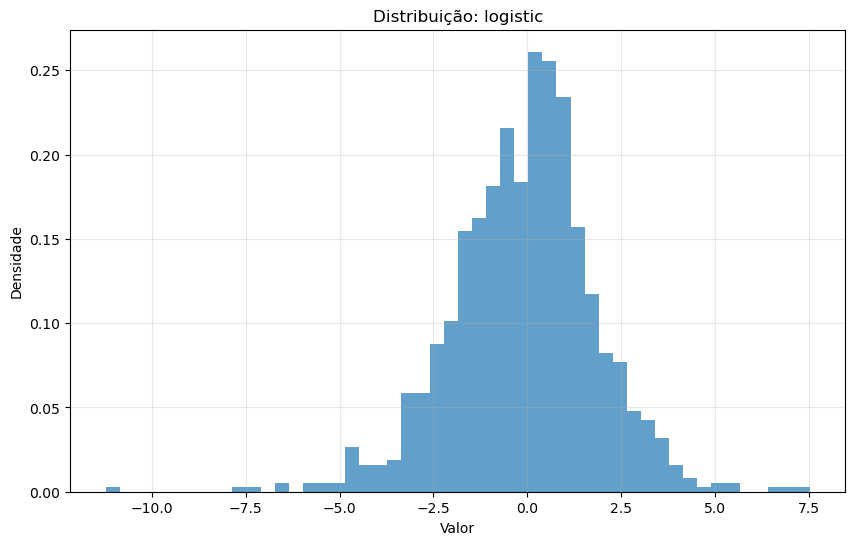


Estatística da distribuição normal:
mean: -0.007
std: 1.004
min: -3.119
max: 3.126
median: -0.017


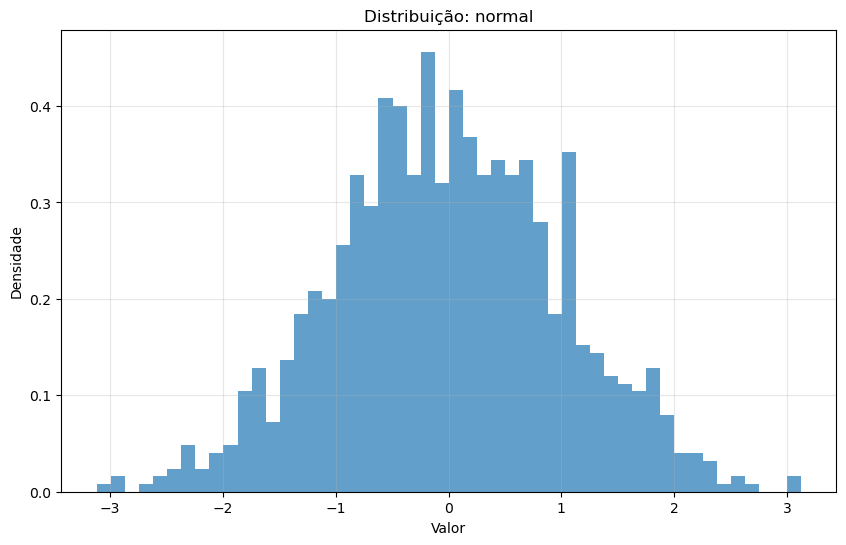


Estatística da distribuição uniform:
mean: 1.000
std: 0.000
min: 1.000
max: 1.000
median: 1.000


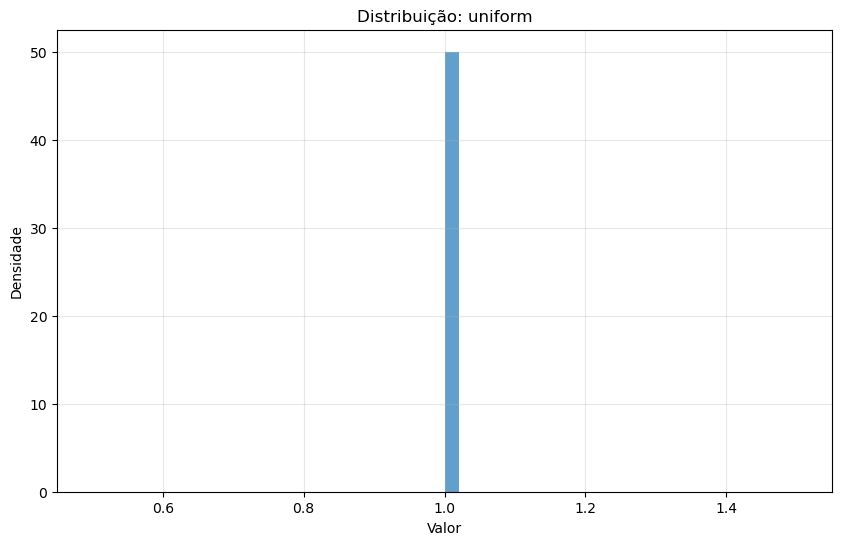

In [3]:
class RandomNumberGenerator:
    """
    Classe para demonstração abrangente de geração de números aleatórios usando numpy.random. Generator
    """
    def __init__(self, seed: Optional[int] = None):
        """
        Inicialliza o gerador com uma semente opcional

        Args:
            seed: Semente para reprodutibilidade (padrão: None)
        """
        self.rng = np.random.default_rng(seed)

    def demonstrate_basic_random(self, size: Tuple[int, ...]) -> dict:
        """
        Demonstra geração básica de números aleatórios

        Args:
            size: Forma do array de saída

        Returns:
            Dicionário com diferentes tipos de números aleatórios
        """
        results = {
            'random_float': self.rng.random(size), # Números entre 0 e 1
            'random_integers': self.rng.integers(low=1, high=100, size=size), # Inteiros entre 1 e 100
            'random_choice': self.rng.choice(
                ['A', 'B', 'C', 'D'], size=size, p=[0.4, 0.3, 0.2, 0.1] # Probabilidades customizadas
            )
        }
        return results

    def demonstrate_permutations(self, arr: np.ndarray) -> dict:
        """
        Demonstra diferentes tipos de permutações

        Args:
            arr: Array para permutação

        Returns:
            Dicionário com diferentes tipos de permutações
        """
        # Cria cópias para demonstrar diferentes métodos
        arr_shuffle = arr.copy()
        arr_permuted = arr.copy()

        # Embralha in-place
        self.rng.shuffle(arr_shuffle)

        results = {
            'original': arr,
            'shuffled': arr_shuffle,
            'permutation': self.rng.permuted(arr),
            'permuted': self.rng.permuted(arr_permuted)
        }
        return results

    def demonstrate_distributions(self, size: int) -> dict:
        """
        Demonstra diferentes distribuições probabilísticas

        Args:
            size: Tamanho da amostra

        Returns:
            Dicionário com amostras de diferentes distribuições
        """
        distributions = {
            'beta': self.rng.beta(a=2, b=5, size=size),
            'binomial': self.rng.binomial(n=10, p=0.5, size=size),
            'chisquare': self.rng.chisquare(df=2, size=size),
            'exponential': self.rng.exponential(scale=0.2, size=size),
            'gamma': self.rng.gamma(shape=2.0, scale=2, size=size),
            'logistic': self.rng.logistic(loc=0.0, scale=1.0, size=size),
            'normal': self.rng.normal(loc=0.0, scale=1.0, size=size),
            'uniform': self.rng.uniform(low=1.0, high=1.0, size=size),
        }

        return distributions

    def plot_distribution(self, data: np.ndarray, title: str) -> None:
        """
        Plota histograma de uma distribuição

        Args:
            data: Dados para o plotar
            title: Título do gráfico
        """
        plt.figure(figsize=(10, 6))
        plt.hist(data, bins=50, density=True, alpha=0.7)
        plt.title(f'Distribuição: {title}')
        plt.xlabel('Valor')
        plt.ylabel('Densidade')
        plt.grid(True, alpha=0.3)
        plt.show()

    def analyze_distribution(self, data: np.ndarray) -> dict:
        """
        Analisa estatísticas básicas de uma distribuição

        Args:
            data: Dados para análise

        Returns:
            Dicionário com estatísticas
        """
        return {
            'mean': np.mean(data),
            'std': np.std(data),
            'min': np.min(data),
            'max': np.max(data),
            'median': np.median(data)
        }

def main():
    # Inicializa gerador com semente para reprodutibilidade
    generator = RandomNumberGenerator(seed=42)

    # 1. Demonstração de números aleatórios básicos
    print('\n1. Números Aleatórios Básicos:')
    basic_random = generator.demonstrate_basic_random(size=(5, ))
    for name, values in basic_random.items():
        print(f'{name}: {values}')

    # 2. Demonstração de permutações
    print('\n2. Permutações:')
    arr = np.arange(10)
    permutations = generator.demonstrate_permutations(arr)
    for name, values in permutations.items():
        print(f'{name}: {values}')

    # 3. Demonstração de distribuições
    print('\n3. Distribuições Probabilísticas:')
    distributions = generator.demonstrate_distributions(size=1000)

    # Análise e vizualição de cada distribuição
    for name, data in distributions.items():
        print(f'\nEstatística da distribuição {name}:')
        stats = generator.analyze_distribution(data)
        for stat_name, value in stats.items():
            print(f'{stat_name}: {value:.3f}')

        # Plota a distribuição
        generator.plot_distribution(data, name)
if __name__ == '__main__':
    main()